## HW4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

# Change the seed to get different random numbers
np.random.seed(1)

### Problem 2.1: PCA for dimension reduction (3 Points)

In this problem you will approximately reconstruct images by simplifying them to multiples of a few principal components.

Note: When you display the images, use the color map `cmap=plt.cm.gray.reversed()` for MNIST.

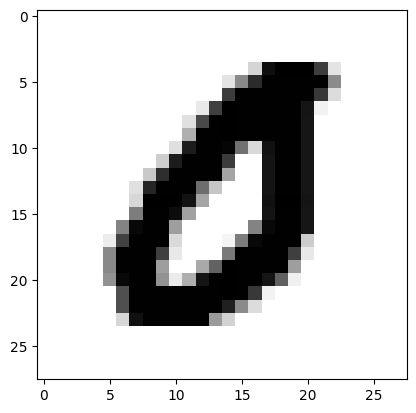

In [ ]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28]) # 28 by 28 images and a total of 60000 of them
zeros = np.where(y==0)[0]
x = x[zeros,:]
y = y[zeros]
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

For $k = 0, 10, 20, 30, 40, 49$, use $k$-th principal components for MNIST $0$'s to approximately reconstruct the image selected above. Noting that we index from 0, namely 0-th pricipal component is the first one. Display the reconstruction for each value of $k$. To display the set of images compactly, you may want to use the 'plot_images' function defined below.

In [ ]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        if i >= len(images):
            break
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Variance explained by first 50 principal vectors: 88.04%


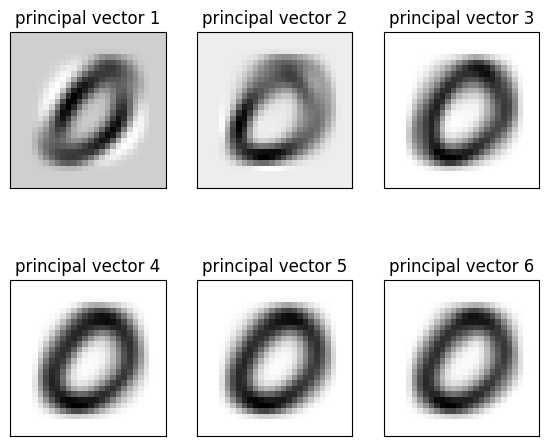

In [ ]:
from sklearn.decomposition import PCA

height = 28
width = 28
num_components = 50

k = [0, 10, 20, 30, 40, 49]

pca = PCA(num_components).fit(x)
pcs = pca.fit_transform(x)
principal_vectors = pca.components_
principal_vectors = principal_vectors.reshape((num_components, height, width))
principal_components = pca.components_



recon_img = []
k_values = [0, 10, 20, 30, 40, 49]

average_image = pca.mean_
recon_img = []

for k in [0, 10, 20, 30, 40, 49]:
    image_projection = np.dot(x[my_image], principal_components[k]) * principal_components[k]

    recon_img_k = average_image + image_projection
    recon_img.append(recon_img_k.reshape(height, width))


labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]

plot_images(recon_img, labels, height, width, 2, 3)

ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))

Your explanation here (and in your report)

### Problem 2.2: PCA for classification (7 Points)

#### Part (a)

In [ ]:
from sklearn.linear_model import LogisticRegression

(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
x_test = x_test.reshape([10000, 28*28])

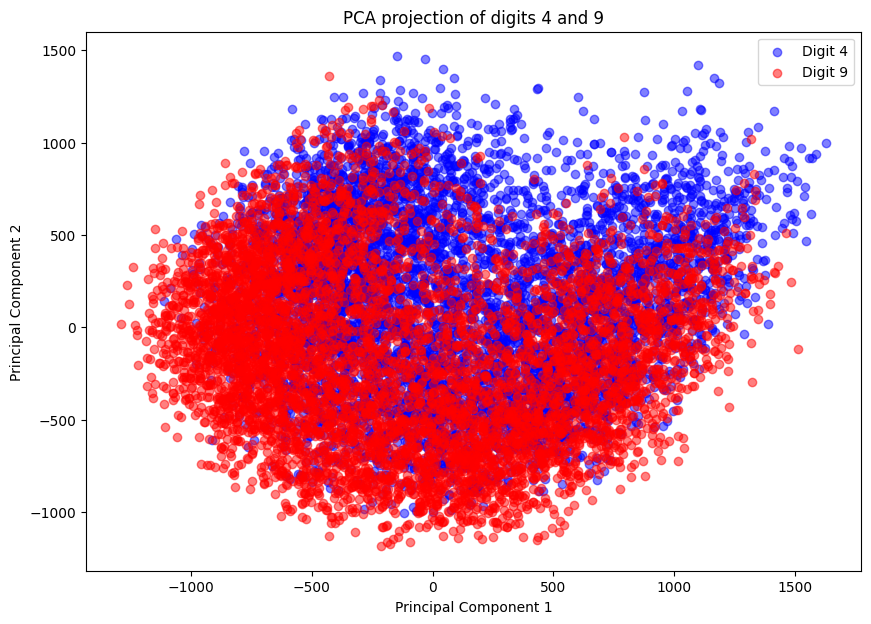

In [ ]:
# Your Code Here
indices = np.where((y == 4) | (y == 9))

x_sub = x[indices]
y_sub = y[indices]

pca = PCA(n_components=2).fit_transform(x_sub)

plt.figure(figsize=(10, 7))
for label, color in zip([4, 9], ['blue', 'red']):
    plt.scatter(pca[y_sub == label, 0], pca[y_sub == label, 1], c=color, alpha=0.5, label=f"Digit {label}")

plt.title('PCA projection of digits 4 and 9')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Your explanation here (and in your report)

#### Part (b)

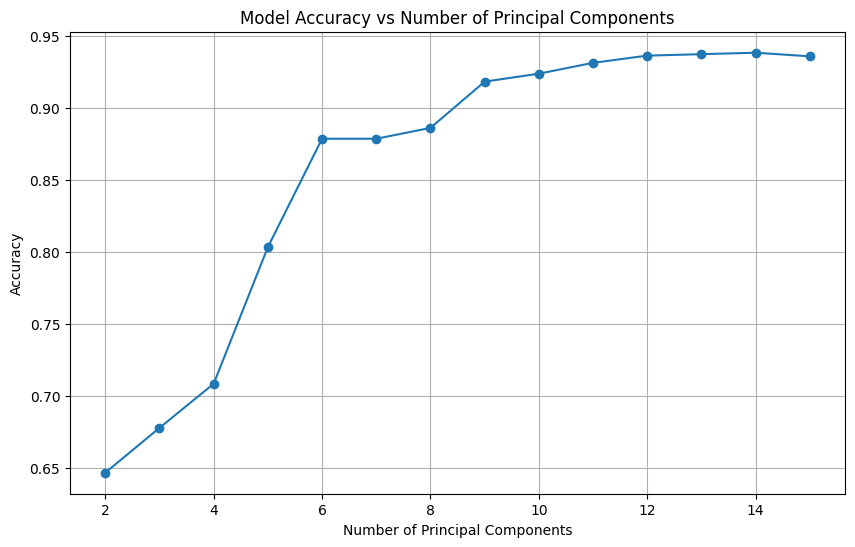

In [ ]:
# Your Code Here
from sklearn.model_selection import train_test_split

def filtering(x, y) :
  idx = np.where((y == 4) | (y == 9))
  return x[idx], y[idx]

x_sub, y_sub = filtering(x,y)
x_test_sub, y_test_sub = filtering(x_test, y_test)

k_values = [k for k in range(2, 16)]

accuracies = []

for k in k_values :
  pca = PCA(n_components=k)
  x_train_pca = pca.fit_transform(x_sub)
  x_test_pca = pca.transform(x_test_sub)

  l_model = LogisticRegression(max_iter = 1000, solver='lbfgs')
  l_model.fit(x_train_pca, y_sub)

  accuracy = l_model.score(x_test_pca, y_test_sub)
  accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Model Accuracy vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Your explanation here (and in your report)